In [1]:
#Import === libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import os
from IPython.display import display
import statsmodels as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_squared_error
from sklearn import preprocessing
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.iolib.summary2 import summary_col

C:\Users\Kingsley\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [35]:
# Import data
df= pd.read_csv("C:/Users/Kingsley/Desktop/Wale/clidata.csv")
df.head()

,Rainfall,Max.Air.Temp,Wat.Dem
0,10.7,9.6,11.478819
1,1.7,10.1,11.495894
2,9.8,10.1,11.453051
3,1.2,9.4,11.498321
4,1.2,8.2,11.512425


In [3]:
#Create a 1-day lag (t-1) in the variables
df['LRainfall'] = df['Rainfall'].shift(1)
df['LMax.Air.Temp'] = df['Max.Air.Temp'].shift(1)
df['LWat.Dem'] = df['Wat.Dem'].shift(1)

In [4]:
df.head()
# let's print the summary statistics of the data
df=df.fillna(df.mean())
display(df.describe())

,Rainfall,Max.Air.Temp,Wat.Dem,LRainfall,LMax.Air.Temp,LWat.Dem
count,1735.000000,1735.000000,1735.000000,1735.000000,1735.000000,1735.000000
mean,7.005418,13.378444,11.834203,7.008766,13.376990,11.833826
std,6.316078,4.295633,0.350321,6.314538,4.295206,0.349970
min,0.100000,-0.200000,11.060697,0.100000,-0.200000,11.060697
25%,1.200000,10.100000,11.570562,1.200000,10.100000,11.570562
50%,5.500000,13.000000,11.875179,5.500000,13.000000,11.875179
75%,11.500000,17.000000,12.052297,11.500000,17.000000,12.051216
max,20.400000,24.900000,12.609909,20.400000,24.900000,12.609909


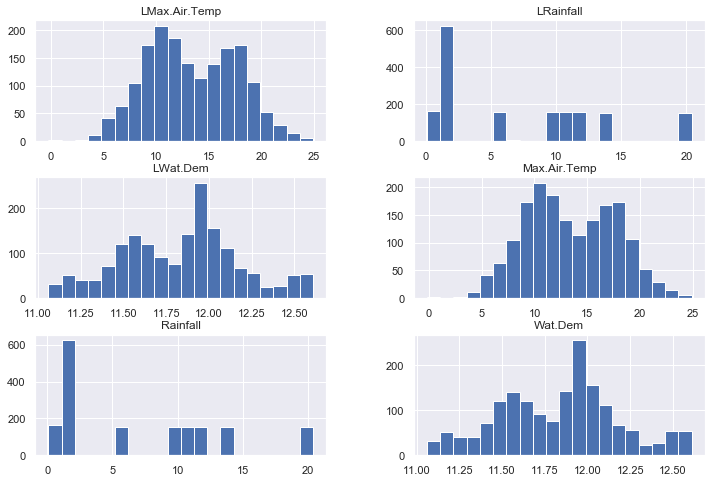

In [5]:
# let's visualize the distribution of the features of the data
df.hist(figsize=(12,8),bins=20)
plt.show()

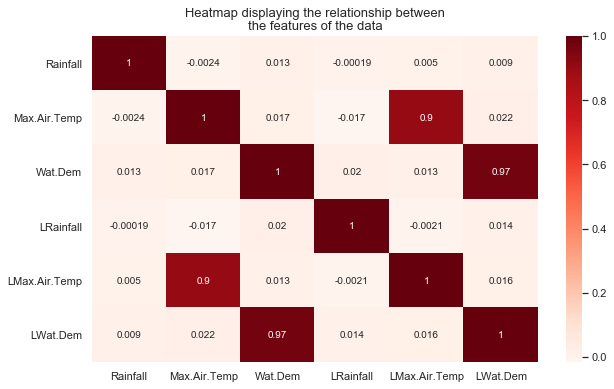

In [6]:
# Let's visualize the relationships between the water demand and climatological variables....
#.... the other features.
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),cmap=plt.cm.Reds,annot=True)
plt.title('Heatmap displaying the relationship between\nthe features of the data',
         fontsize=13)
plt.show()

In [7]:
df.dtypes

Rainfall         float64
Max.Air.Temp     float64
Wat.Dem          float64
LRainfall        float64
LMax.Air.Temp    float64
LWat.Dem         float64
dtype: object

In [8]:
reg1 = sm.OLS(endog=df['Wat.Dem'], exog=df[['Rainfall', 'Max.Air.Temp','LRainfall', 'LMax.Air.Temp','LWat.Dem' ]], \
    missing='drop')
type(reg1)

statsmodels.regression.linear_model.OLS

In [9]:
results = reg1.fit()
type(results)

statsmodels.regression.linear_model.RegressionResultsWrapper

In [10]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                Wat.Dem   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.416e+06
Date:                Sat, 07 Nov 2020   Prob (F-statistic):               0.00
Time:                        22:12:15   Log-Likelihood:                 1901.6
No. Observations:                1735   AIC:                            -3793.
Df Residuals:                    1730   BIC:                            -3766.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Rainfall          0.0003      0.000      0.899

In [11]:
# Add constant term to dataset
df['const'] = 1

'Rainfall', 'Max.Air.Temp','LRainfall', 'LMax.Air.Temp','LWat.Dem' 'Wat.Dem'
# Create lists of variables to be used in each regression
X1 = ['const', 'LWat.Dem','Max.Air.Temp','Rainfall']
X2 = ['const', 'LWat.Dem','Max.Air.Temp','Rainfall','LMax.Air.Temp','LRainfall']
X3 = ['const', 'LWat.Dem','Max.Air.Temp','LMax.Air.Temp']

# Estimate an OLS regression for each set of variables
reg1 = sm.OLS(df['Wat.Dem'], df[X1], missing='drop').fit()
reg2 = sm.OLS(df['Wat.Dem'], df[X2], missing='drop').fit()
reg3 = sm.OLS(df['Wat.Dem'], df[X3], missing='drop').fit()


In [12]:
info_dict={'R-squared' : lambda x: f"{x.rsquared:.2f}",
           'No. observations' : lambda x: f"{int(x.nobs):d}"}

results_table = summary_col(results=[reg1,reg2,reg3],
                            float_format='%0.2f',
                            stars = True,
                            model_names=['Model 1',
                                         'Model 2',
                                         'Model 3'],
                            info_dict=info_dict,
                            regressor_order=['const',
                                             'avexpr',
                                             'lat_abst',
                                             'asia',
                                             'africa'])

results_table.add_title('Table 2 - OLS Regressions')

print(results_table)

       Table 2 - OLS Regressions
                 Model 1 Model 2 Model 3
----------------------------------------
const            0.31*** 0.31*** 0.31***
                 (0.07)  (0.07)  (0.07) 
LMax.Air.Temp            0.00    0.00   
                         (0.00)  (0.00) 
LRainfall                0.00           
                         (0.00)         
LWat.Dem         0.97*** 0.97*** 0.97***
                 (0.01)  (0.01)  (0.01) 
Max.Air.Temp     -0.00   -0.00   -0.00  
                 (0.00)  (0.00)  (0.00) 
Rainfall         0.00    0.00           
                 (0.00)  (0.00)         
R-squared        0.95    0.95    0.95   
No. observations 1735    1735    1735   
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


In [13]:
df.shape

(1735, 7)

In [14]:
y = df['Wat.Dem']

In [15]:
X = df.drop(['Max.Air.Temp'], axis=1)

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1234)

In [17]:
X_train.shape, y_train.shape

((1214, 6), (1214,))

In [18]:
X_test.shape, y_test.shape

((521, 6), (521,))

In [19]:
X.columns

Index(['Rainfall', 'Wat.Dem', 'LRainfall', 'LMax.Air.Temp', 'LWat.Dem',
       'const'],
      dtype='object')

In [20]:
### Neural Network Regression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create MLPRegressor object
mlp = MLPRegressor()

In [21]:
# Train the model using the training sets
mlp.fit(X_train, y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [22]:
# Score the model
neural_network_regression_score = mlp.score(X_test, y_test)
neural_network_regression_score

0.9305332272051127

In [23]:
# Score the model
neural_network_regression_score = mlp.score(X_train, y_train)
neural_network_regression_score

0.9420792799072943

In [24]:
# Make predictions using the testing set
nnr_pred = mlp.predict(X_test)

In [25]:
from math import sqrt
# The mean squared error
print("Root mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, nnr_pred)))
# The absolute squared error
print("Mean absolute error: %.2f"
      % mean_absolute_error(y_test, nnr_pred))
# Explained variance score: 1 is perfect prediction
print('R-squared: %.2f' % r2_score(y_test, nnr_pred))

Root mean squared error: 0.09
Mean absolute error: 0.07
R-squared: 0.93


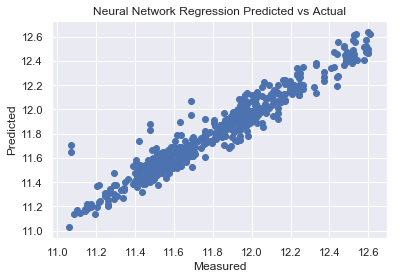

In [26]:
plt.scatter(y_test, nnr_pred)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Neural Network Regression Predicted vs Actual')
plt.show()

       Date  Rainfall  Max.Air.Temp    Wat.Dem  LRainfall  LMax.Air.Temp  \
0  1-Jan-16      10.7           9.6  11.478819        NaN            NaN   
1  2-Jan-16       1.7          10.1  11.495894       10.7            9.6   
2  3-Jan-16       9.8          10.1  11.453051        1.7           10.1   
3  4-Jan-16       1.2           9.4  11.498321        9.8           10.1   
4  5-Jan-16       1.2           8.2  11.512425        1.2            9.4   

    LWat.Dem  
0        NaN  
1  11.478819  
2  11.495894  
3  11.453051  
4  11.498321  


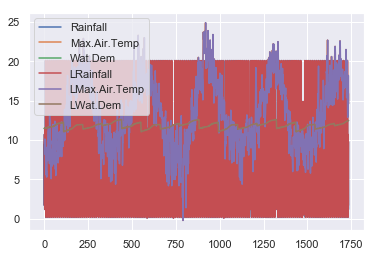

In [27]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
def parser(x):
    return datetime.strptime('1735'+x, '%Y-%m')

series= pd.read_csv("C:/Users/Kingsley/Desktop/Wale/clidata_d.csv")
#Create a 1-day lag (t-1) in the variables
series['LRainfall'] = series['Rainfall'].shift(1)
series['LMax.Air.Temp'] = series['Max.Air.Temp'].shift(1)
series['LWat.Dem'] = series['Wat.Dem'].shift(1)
print(series.head())
series.plot()
pyplot.show()

In [39]:
# create lagged dataset
values = df(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']

# create lagged dataset
values = df(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']

TypeError: 'DataFrame' object is not callable

C:\Users\Kingsley\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


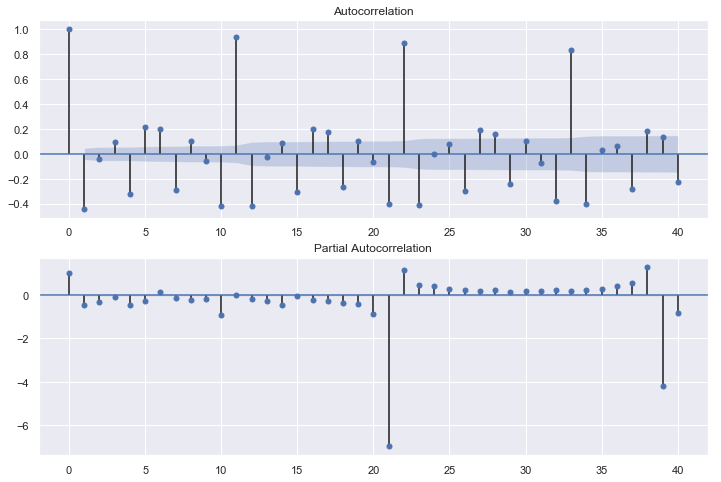

In [28]:
#stationarity for Rainfall
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Rainfall'].diff().dropna(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Rainfall'].diff().dropna(), lags=40, ax=ax2)
plt.show()

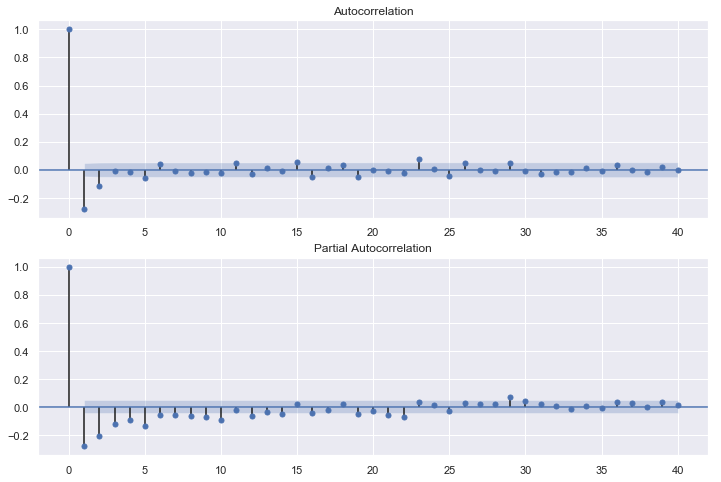

In [29]:
#stationarity for Maximum Air Temperature
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Max.Air.Temp'].diff().dropna(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Max.Air.Temp'].diff().dropna(), lags=40, ax=ax2)
plt.show()

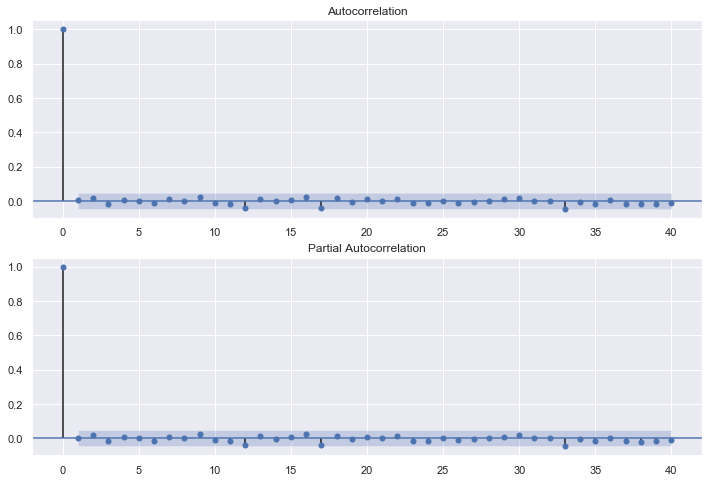

In [30]:
#stationarity for Water Demand
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Wat.Dem'].diff().dropna(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Wat.Dem'].diff().dropna(), lags=40, ax=ax2)
plt.show()

In [31]:
model=sm.tsa.statespace.SARIMAX(endog=df['Wat.Dem'],order=(1,1,0),seasonal_order=(0,1,0,12),trend='c',enforce_invertibility=False)
results=model.fit()
print(results.summary())

                                 Statespace Model Results                                 
Dep. Variable:                            Wat.Dem   No. Observations:                 1735
Model:             SARIMAX(1, 1, 0)x(0, 1, 0, 12)   Log Likelihood                1259.499
Date:                            Sat, 07 Nov 2020   AIC                          -2512.999
Time:                                    22:12:22   BIC                          -2496.645
Sample:                                         0   HQIC                         -2506.949
                                           - 1735                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   5.384e-06      0.003      0.002      0.998      -0.005       0.006
ar.L1          0.0061      0.084   

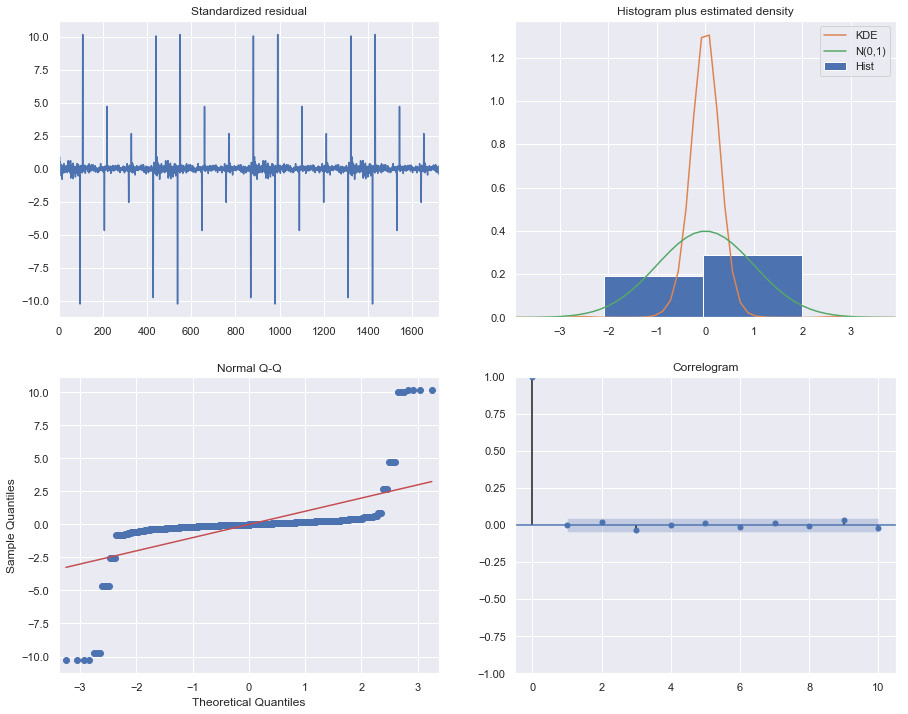

In [32]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [33]:
# Get forecast 500 steps ahead in future
pred_uc = results.get_forecast(steps=500)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

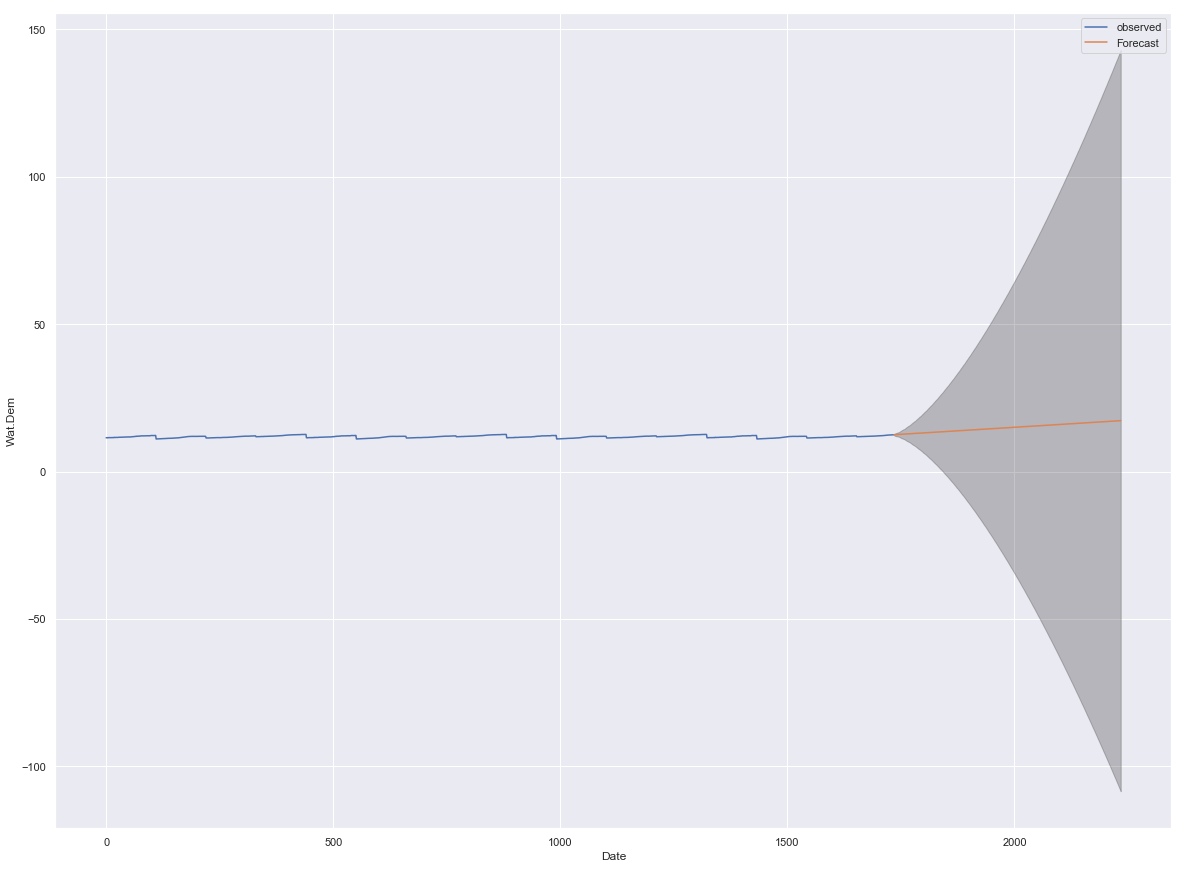

In [34]:
ax = y.plot(label='observed', figsize=(20, 15))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Wat.Dem')

plt.legend()
plt.show()

In [40]:
#Split into Training and Test Data
#Cross validation is always desired when training machine learning models to be able to trust the generality of the model created. We will split our data into training and test data using Scikit learn's built in tools. Also for scikit learn we need to separate our dataset into inputs and the feature being predicted (or X's and y's).

y = df['Wat.Dem']

In [41]:
X = df.drop(['Wat.Dem'], axis=1)

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1234)

In [43]:
X_train.shape, y_train.shape

((1214, 2), (1214,))

In [44]:
X_test.shape, y_test.shape

((521, 2), (521,))

In [45]:
X.columns

Index(['Rainfall', 'Max.Air.Temp'], dtype='object')

In [46]:
###Decision Forest Regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create Random Forrest Regressor object
regr_rf = RandomForestRegressor(n_estimators=200, random_state=1234)

In [47]:
# Train the model using the training sets
regr_rf.fit(X_train, y_train)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
           oob_score=False, random_state=1234, verbose=0, warm_start=False)

In [48]:
regr_rf.fit(X_test, y_test)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
           oob_score=False, random_state=1234, verbose=0, warm_start=False)

In [55]:
# Score the model
decision_forest_score = regr_rf.score(X_test, y_test)
decision_forest_score

0.6883719079998727

In [56]:
decision_forest_score = regr_rf.score(X_train, y_train)
decision_forest_score

-0.3208637707059132

In [51]:
# Make predictions using the testing set
regr_rf_pred = regr_rf.predict(X_test)

In [52]:
from math import sqrt
# The mean squared error
print("Root mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, regr_rf_pred)))
# The absolute squared error
print("Mean absolute error: %.2f"
      % mean_absolute_error(y_test, regr_rf_pred))
# Explained variance score: 1 is perfect prediction
print('R-squared: %.2f' % r2_score(y_test, regr_rf_pred))

Root mean squared error: 0.19
Mean absolute error: 0.15
R-squared: 0.69


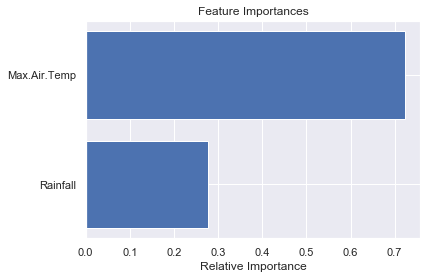

In [53]:
features = X.columns
importances = regr_rf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.show()



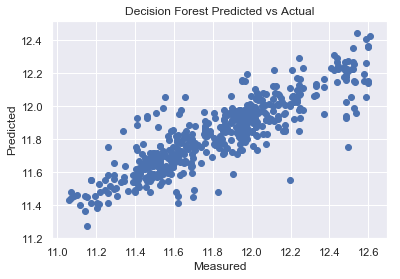

In [54]:
plt.scatter(y_test, regr_rf_pred)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Decision Forest Predicted vs Actual')
plt.show()